In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from preprocessing import StandardScaler, Split
from model import Regressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
timesteps = 90
end = 30

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
W = 2
H = 89
x = np.array([data[i-W:i] for i in range(W, len(data))])
x = np.array([x[i-H:i] for i in range(H, len(x)+1)]).reshape(-1, H, 1, W)
y = np.array([data[i] for i in range(90, len(data))]).reshape(-1, 1)

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [6]:
scaler = StandardScaler(y_train)
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)
x_val = scaler.transform(x_val)
y_val = scaler.transform(y_val)
x_test = scaler.transform(x_test)

In [7]:
x_test = torch.FloatTensor(x_test).to(device)

In [8]:
model = Regressor().to(device)
model = torch.load('checkpoint.pt')

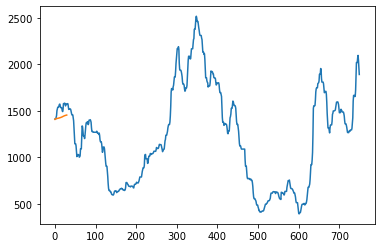

In [9]:
plt.plot(y_test)
start = 0
tmp = x_test[start].unsqueeze(0)
ls = []
for _ in range(end):
    model.eval()
    with torch.no_grad():
        pred = model(tmp)
        ls.append(pred.item())
        tmp = tmp[:, -H+1:]
        seq = torch.cat((tmp[:, -1, :, :].unsqueeze(1), pred.view(1,1,1,1)), dim=3)[:,:,:,-W:]
        tmp = torch.cat((tmp, seq), dim=1)

ls = scaler.inverse_transform(np.array(ls))
plt.plot(range(start, start + end), ls)
plt.show()

In [10]:
np.save('cnn-lstm.npy', ls)

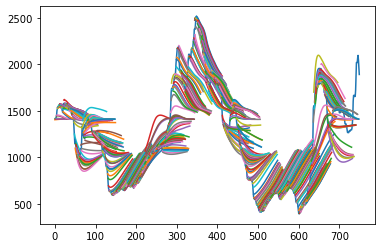

In [9]:
plt.plot(y_test)
table = []
for i in range(750-end):
    start = i
    tmp = x_test[start].unsqueeze(0)
    ls = []
    for _ in range(end):
        model.eval()
        with torch.no_grad():
            pred = model(tmp)
            ls.append(pred.item())
            tmp = tmp[:, -H+1:]
            seq = torch.cat((tmp[:, -1, :, :].unsqueeze(1), pred.view(1,1,1,1)), dim=3)[:,:,:,-W:]
            tmp = torch.cat((tmp, seq), dim=1)

    ls = scaler.inverse_transform(np.array(ls))
    table.append(metrics.mean_absolute_error(y_test[start:start + end], ls))
    plt.plot(range(start, start + end), ls)
plt.show()

In [10]:
for i in table:
    print(i)

152.3661440931823
156.81137626917044
164.9395478769649
170.73852204497308
166.19941153492422
168.3777254270541
148.23944791001534
151.71986645594225
154.48272521707122
155.11352491011266
158.05269869116188
164.167352376605
168.70364304234616
171.83085611718585
165.23208300541938
162.75421322658093
173.43720309104822
170.2829681349892
162.4873740876189
170.60906614344609
166.63677123112328
181.3646933688386
207.59166979277708
188.39911092237529
198.83267632153144
200.24090605464554
195.3896607143066
175.4431082738449
204.39364555250455
203.84774547907375
204.11249470503287
210.04731541924653
215.9029210333397
216.4963535716026
165.0684652920334
155.83633104783343
188.75999265189574
173.45300008132952
185.0406865496391
200.49470239355088
177.65051591901778
163.03402381655403
158.90457248693963
157.5853913679375
167.82048641457396
171.21620123470194
135.19167291877798
122.8189614705317
238.88845143201746
257.6468691573497
307.10461149162967
262.4697335167995
266.0637864571514
277.53617185

In [11]:
print(np.mean(table))

254.91637332957478
